**Kevin Kyendy Mauwi**

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(url, sep="\s+", skiprows=22, header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
X = df.drop(columns=['MEDV'])  # Features (excluding target column)
y = df['MEDV']  # Target variable
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
5,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,NaN,NaN,NaN
7,394.63000,2.94,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.06905,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,NaN,NaN,NaN
9,396.90000,5.33,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
selected_columns = ['CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO']
df_selected = df[selected_columns]

We're specifying the separator as \s+, which indicates one or more whitespace characters. We're also skipping the first 22 rows (since the data starts from row 23) and providing the column names explicitly. 

In [18]:
df_selected.shape

(1012, 7)

In [19]:
# Exploratory Data Analysis and Preprocessing

# checking for missing values
df_selected.isnull().sum()

CRIM         0
ZN           0
INDUS        0
DIS        506
RAD        506
TAX        506
PTRATIO    506
dtype: int64

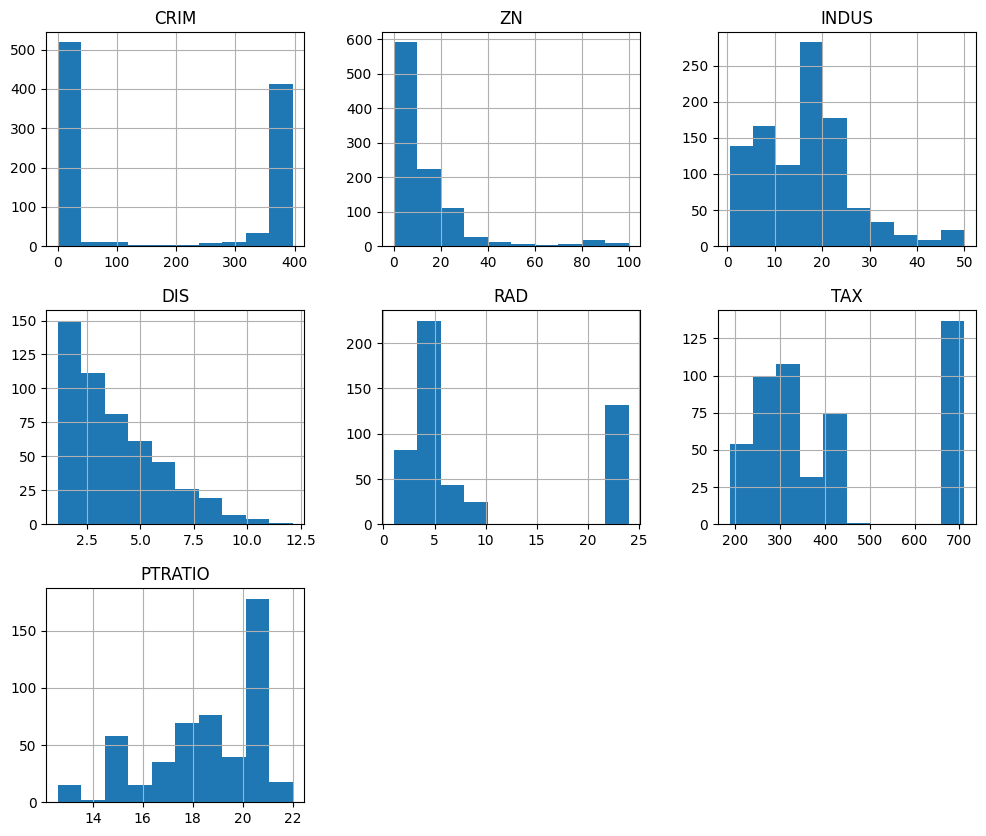

In [20]:
# visualize
# histogram
df_selected.hist(figsize=(12, 10))
plt.show()

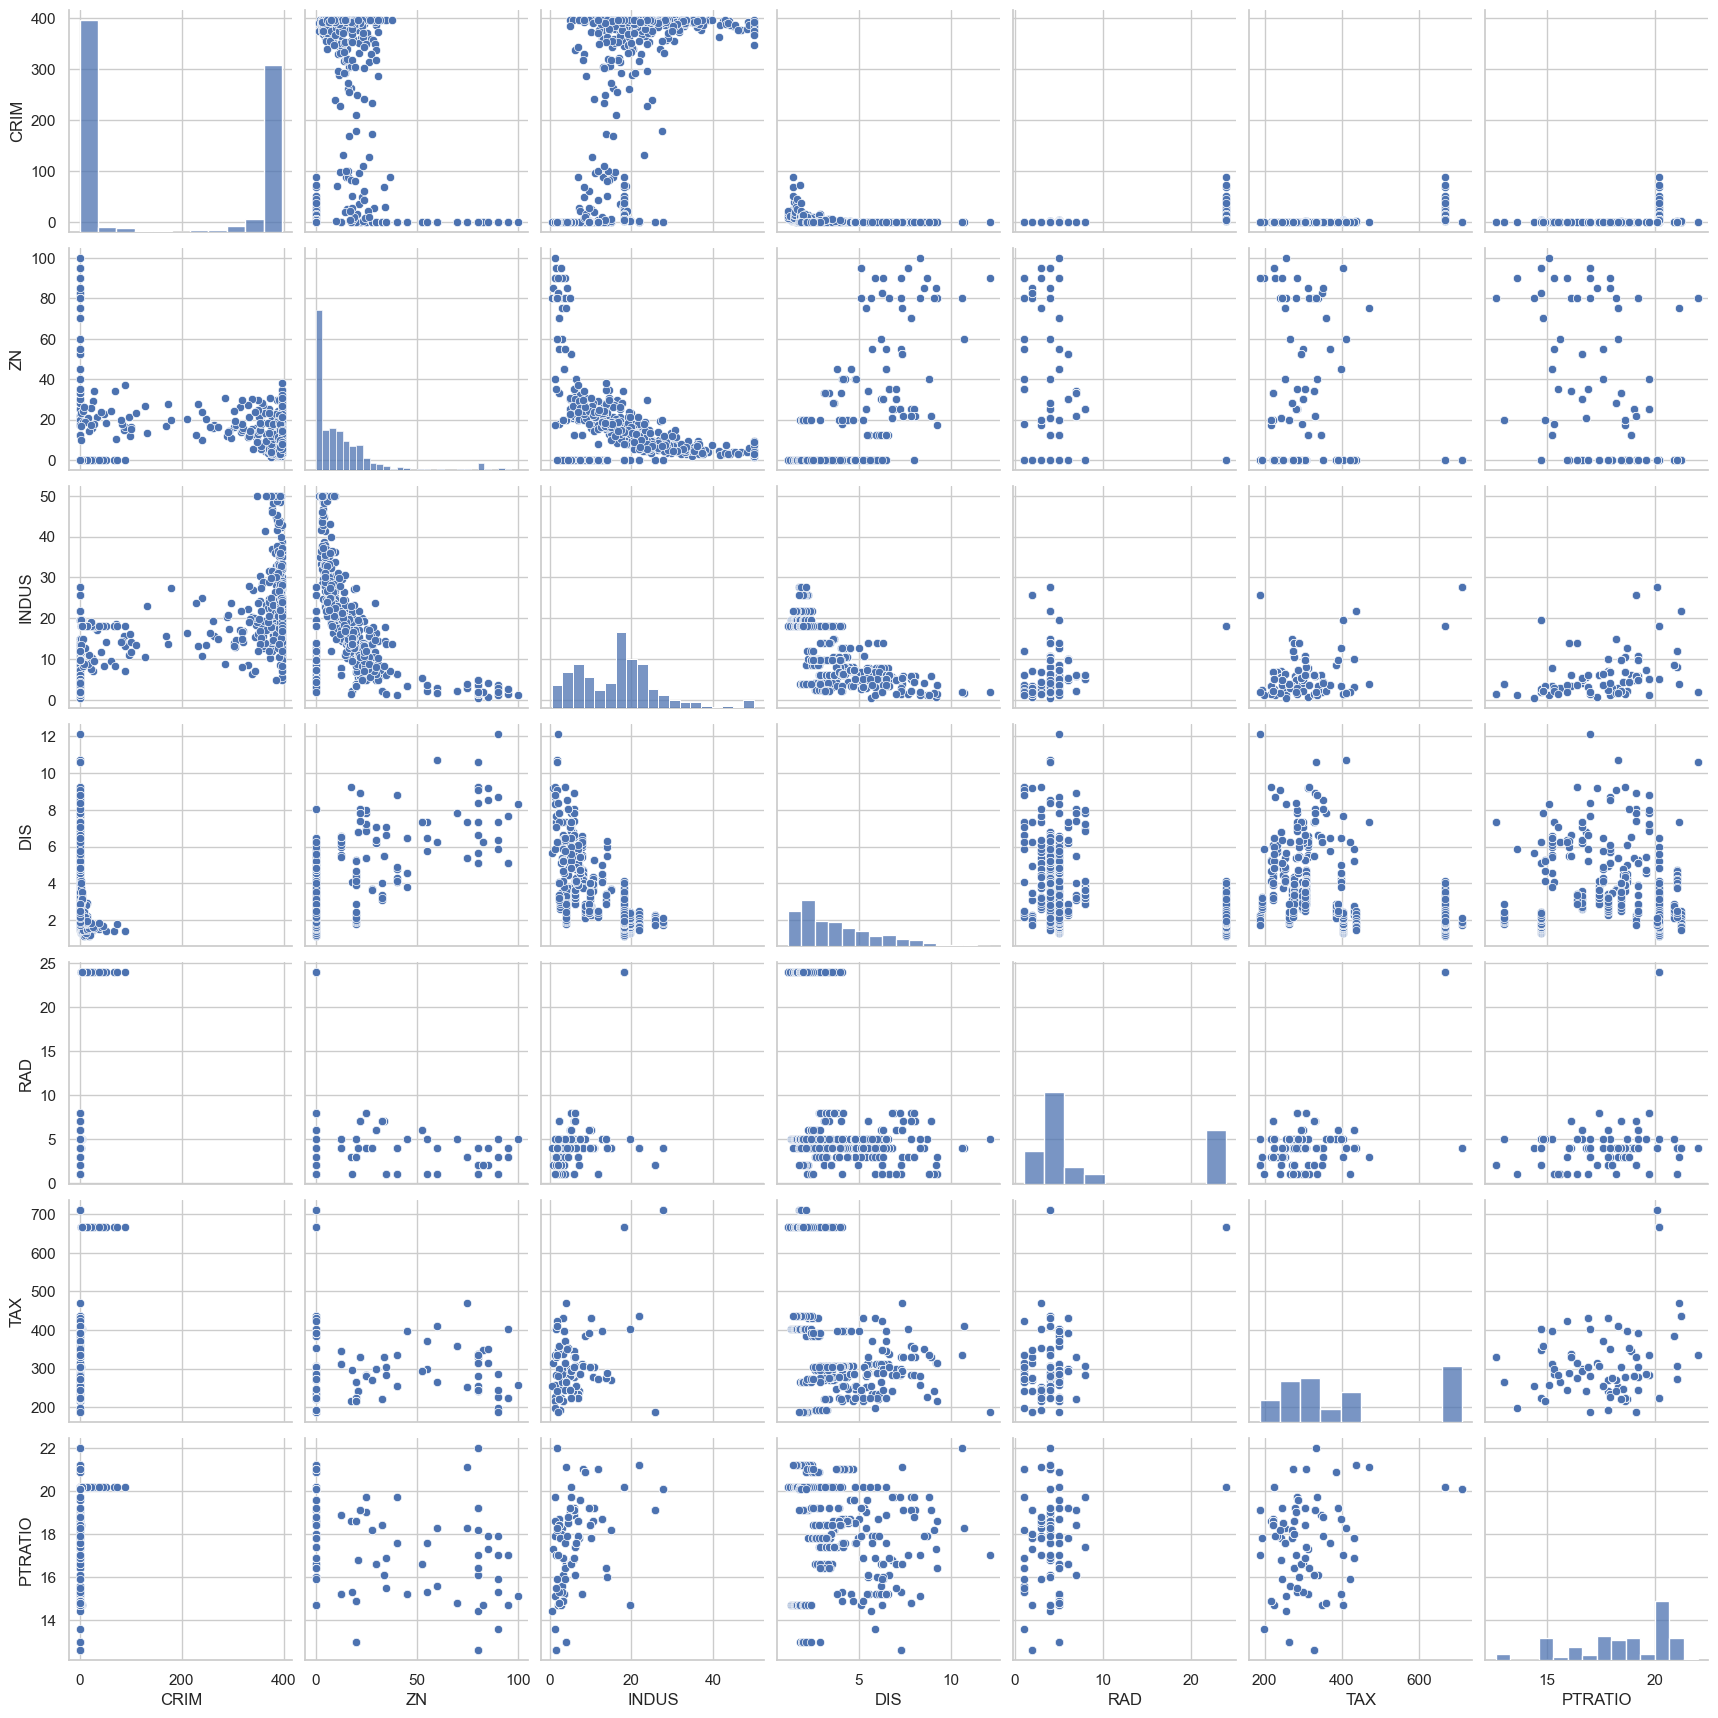

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot scatter plots for selected columns
sns.pairplot(df_selected)
plt.show()


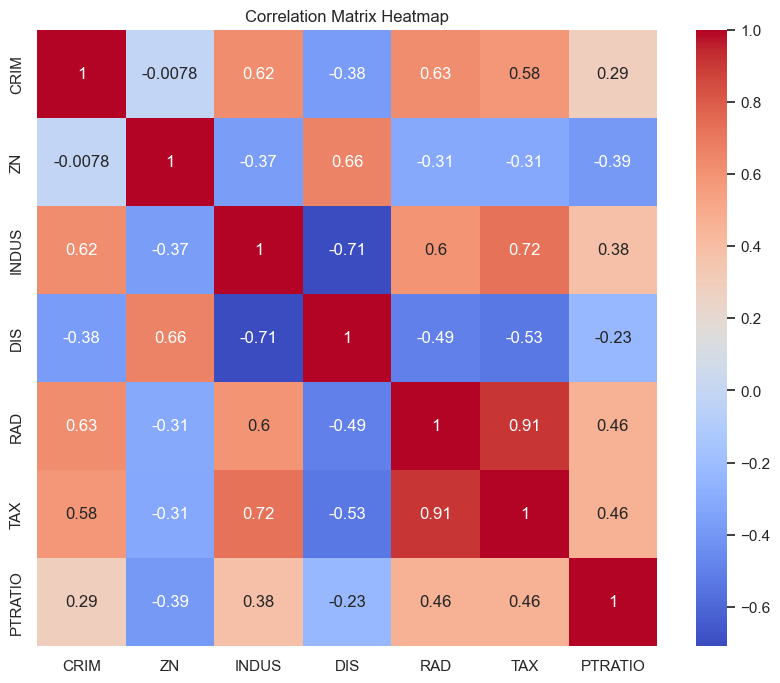

In [23]:
# Correlation heatmap 
# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
y

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1007   NaN
1008   NaN
1009   NaN
1010   NaN
1011   NaN
Name: MEDV, Length: 1012, dtype: float64

In [ ]:
# implementing simple linear regression
